## Four seasons plot(s)

Goals:
* Create map plots of various fields compared to obs
* Example below is of radiation field

Requirements:
* Requires Diags_library.py to be in the same directory for plotting
* Unlike other notebooks here, this requires loading e3sm_unified environment and using that kernel. 
** Example of required libraries are xcdat, cdutil, genutil, MV2


In [1]:
import matplotlib.pyplot as plt

In [2]:
import cdms2
import cdutil
import genutil
import numpy as np
import pylab as pl
cdms2.setAutoBounds(1)
import xarray

In [3]:
import matplotlib.colors as colors
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from matplotlib.colors import LinearSegmentedColormap
import Diags_library

In [4]:
import xcdat

In [5]:
import MV2

In [6]:
# Load SCREAMv1 regridded files with the TOM Vars (for SW and LW fluxes)
directory_prefix='/global/cfs/cdirs/e3sm/terai/SCREAM/v1_production'
f_Jan=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_DY2/output.scream.TOMVars.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)
f_Apr=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_Apr2013/output.scream.TOMVars.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)
f_Aug=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_DY1/output.scream.TOMVars.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)
f_Oct=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_40dayrun/output.scream.TOMVars.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)


In [8]:
lon_rgr=np.array(f_Jan.lon)   # get lon values from SCREAMv1
lat_rgr=np.array(f_Jan.lat)   # get lon values from SCREAMv1

In [9]:
# Load CERES (obs) datasets
directory_prefix='/global/cfs/cdirs/e3sm/terai/Obs_datasets/CERES/'
f_Jan_CERES=xcdat.open_dataset(directory_prefix+'CERES_SYN1deg-Day_Terra-Aqua-MODIS_Ed4.1_Subset_20200101-20200229.nc', add_bounds=True)
f_Apr_CERES=xcdat.open_dataset(directory_prefix+'CERES_SYN1deg-Day_Terra-NPP_Ed1A_Subset_20130401-20130531.nc', add_bounds=True)
f_Aug_CERES=xcdat.open_dataset(directory_prefix+'CERES_SYN1deg-Day_Terra-NPP_Ed1A_Subset_20160801-20160930.nc', add_bounds=True)
f_Oct_CERES=xcdat.open_dataset(directory_prefix+'CERES_SYN1deg-Day_Terra-NPP_Ed1A_Subset_20131001-20131231.nc', add_bounds=True)

2023-04-08 13:31:41,554 [WARNING]: dataset.py(decode_time:321) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.
2023-04-08 13:31:41,714 [WARNING]: dataset.py(decode_time:321) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.
2023-04-08 13:31:41,868 [WARNING]: dataset.py(decode_time:321) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.
2023-04-08 13:31:42,078 [WARNING]: dataset.py(decode_time:321) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.


In [10]:
# Function calculates a time-averaged lat-lon array of 'varname' between 'time1' and 'time2' on specified 'output_grid' 
#    and applies '*coeff' if needed


def calc_timemean_average(filehandle,varname,time1,time2,output_grid,coeff=1.):
    timeavg_var_v1=filehandle.sel(time=slice(time1, time2)).temporal.average(varname)
    regridded_tempAvg_var_v1=timeavg_var_v1.regridder.horizontal(varname,output_grid,tool='xesmf', method='conservative')
    regridded_tempAvg_var_v1=regridded_tempAvg_var_v1*coeff
    return regridded_tempAvg_var_v1

In [11]:
#Create output grid of 2x2 deg
output_grid = xcdat.create_gaussian_grid(90)

In [12]:
## Obtain Net SW flux at TOA from v1 and from CERES (Month of Oct 2013 sim)

# v1 Oct sim
regridded_tempAvg_SWup_v1_Oct=calc_timemean_average(f_Oct,"SW_flux_up@tom",'2013-10-03 00:00:00', '2013-11-09 23:59:59',output_grid,1)
regridded_tempAvg_SWdn_v1_Oct=calc_timemean_average(f_Oct,"SW_flux_dn@tom",'2013-10-03 00:00:00', '2013-11-09 23:59:59',output_grid,1)
regridded_tempAvg_SWnet_v1_Oct=regridded_tempAvg_SWdn_v1_Oct["SW_flux_dn@tom"]-regridded_tempAvg_SWup_v1_Oct["SW_flux_up@tom"]
# CERES Oct
regridded_tempAvg_SWup_CERES_Oct=calc_timemean_average(f_Oct_CERES,'adj_atmos_sw_up_all_toa_daily','2013-10-03 00:00:00', '2013-11-09 23:59:59',output_grid,1)
regridded_tempAvg_SWdn_CERES_Oct=calc_timemean_average(f_Oct_CERES,'adj_atmos_sw_down_all_toa_daily','2013-10-03 00:00:00', '2013-11-09 23:59:59',output_grid,1)
regridded_tempAvg_SWnet_CERES_Oct=regridded_tempAvg_SWdn_CERES_Oct.adj_atmos_sw_down_all_toa_daily-regridded_tempAvg_SWup_CERES_Oct.adj_atmos_sw_up_all_toa_daily





In [13]:
## Obtain Net SW flux at TOA from v1 and from CERES (Month of Apr 2013 and Aug 2016 (DY1) sim)

# v1 Apr sim
regridded_tempAvg_SWup_v1_Apr=calc_timemean_average(f_Apr,"SW_flux_up@tom",'2013-04-03 00:00:00', '2013-05-10 23:59:59',output_grid,1)
regridded_tempAvg_SWdn_v1_Apr=calc_timemean_average(f_Apr,"SW_flux_dn@tom",'2013-04-03 00:00:00', '2013-05-10 23:59:59',output_grid,1)
regridded_tempAvg_SWnet_v1_Apr=regridded_tempAvg_SWdn_v1_Apr["SW_flux_dn@tom"]-regridded_tempAvg_SWup_v1_Apr["SW_flux_up@tom"]
# CERES Apr
regridded_tempAvg_SWup_CERES_Apr=calc_timemean_average(f_Apr_CERES,'adj_atmos_sw_up_all_toa_daily','2013-04-03 00:00:00', '2013-05-10 23:59:59',output_grid,1)
regridded_tempAvg_SWdn_CERES_Apr=calc_timemean_average(f_Apr_CERES,'adj_atmos_sw_down_all_toa_daily','2013-04-03 00:00:00', '2013-05-10 23:59:59',output_grid,1)
regridded_tempAvg_SWnet_CERES_Apr=regridded_tempAvg_SWdn_CERES_Apr.adj_atmos_sw_down_all_toa_daily-regridded_tempAvg_SWup_CERES_Apr.adj_atmos_sw_up_all_toa_daily

# v1 Aug sim
regridded_tempAvg_SWup_v1_Aug=calc_timemean_average(f_Aug,"SW_flux_up@tom",'2016-08-03 00:00:00', '2016-09-09 23:59:59',output_grid,1)
regridded_tempAvg_SWdn_v1_Aug=calc_timemean_average(f_Aug,"SW_flux_dn@tom",'2016-08-03 00:00:00', '2016-09-09 23:59:59',output_grid,1)
regridded_tempAvg_SWnet_v1_Aug=regridded_tempAvg_SWdn_v1_Aug["SW_flux_dn@tom"]-regridded_tempAvg_SWup_v1_Aug["SW_flux_up@tom"]
# CERES Aug
regridded_tempAvg_SWup_CERES_Aug=calc_timemean_average(f_Aug_CERES,'adj_atmos_sw_up_all_toa_daily','2016-08-03 00:00:00', '2016-09-09 23:59:59',output_grid,1)
regridded_tempAvg_SWdn_CERES_Aug=calc_timemean_average(f_Aug_CERES,'adj_atmos_sw_down_all_toa_daily','2016-08-03 00:00:00', '2016-09-09 23:59:59',output_grid,1)
regridded_tempAvg_SWnet_CERES_Aug=regridded_tempAvg_SWdn_CERES_Aug.adj_atmos_sw_down_all_toa_daily-regridded_tempAvg_SWup_CERES_Aug.adj_atmos_sw_up_all_toa_daily


In [14]:
## Obtain Net SW flux at TOA from v1 and from CERES (Month of Jan 2020 (DY2) sim)

# v1 Oct sim
regridded_tempAvg_SWup_v1_Jan=calc_timemean_average(f_Jan,"SW_flux_up@tom",'2020-01-22 00:00:00', '2020-02-28 23:59:59',output_grid,1)
regridded_tempAvg_SWdn_v1_Jan=calc_timemean_average(f_Jan,"SW_flux_dn@tom",'2020-01-22 00:00:00', '2020-02-28 23:59:59',output_grid,1)
regridded_tempAvg_SWnet_v1_Jan=regridded_tempAvg_SWdn_v1_Jan["SW_flux_dn@tom"]-regridded_tempAvg_SWup_v1_Jan["SW_flux_up@tom"]
# CERES Oct
regridded_tempAvg_SWup_CERES_Jan=calc_timemean_average(f_Jan_CERES,'adj_atmos_sw_up_all_toa_daily','2020-01-22 00:00:00', '2020-02-28 23:59:59',output_grid,1)
regridded_tempAvg_SWdn_CERES_Jan=calc_timemean_average(f_Jan_CERES,'adj_atmos_sw_down_all_toa_daily','2020-01-22 00:00:00', '2020-02-28 23:59:59',output_grid,1)
regridded_tempAvg_SWnet_CERES_Jan=regridded_tempAvg_SWdn_CERES_Jan.adj_atmos_sw_down_all_toa_daily-regridded_tempAvg_SWup_CERES_Jan.adj_atmos_sw_up_all_toa_daily


In [15]:
## Take spatial averages to get the global means and to evetually print diff between v1 and CERES Jan 2020 sim

glb_mean_SWup_v1=regridded_tempAvg_SWup_v1_Jan.spatial.average("SW_flux_up@tom",axis="XY")["SW_flux_up@tom"]
glb_mean_SWdn_v1=regridded_tempAvg_SWdn_v1_Jan.spatial.average("SW_flux_dn@tom",axis="XY")["SW_flux_dn@tom"]
glb_mean_SWup_CERES=regridded_tempAvg_SWup_CERES_Jan.spatial.average("adj_atmos_sw_up_all_toa_daily",axis="XY")["adj_atmos_sw_up_all_toa_daily"]
glb_mean_SWdn_CERES=regridded_tempAvg_SWdn_CERES_Jan.spatial.average("adj_atmos_sw_down_all_toa_daily",axis="XY")["adj_atmos_sw_down_all_toa_daily"]

print('Jan')
glb_mean_SWnet_v1=glb_mean_SWdn_v1-glb_mean_SWup_v1
print(np.array(glb_mean_SWnet_v1))
glb_mean_SWnet_CERES=glb_mean_SWdn_CERES-glb_mean_SWup_CERES
print(glb_mean_SWnet_CERES)
print(np.array(glb_mean_SWnet_v1-glb_mean_SWnet_CERES))

Jan
246.67223168320407
<xarray.DataArray ()>
array(246.89349398)
-0.22126229733157743


In [16]:
## Take spatial averages to get the global means and to evetually print diff between v1 and CERES

glb_mean_SWup_v1=regridded_tempAvg_SWup_v1_Apr.spatial.average("SW_flux_up@tom",axis="XY")["SW_flux_up@tom"]
glb_mean_SWdn_v1=regridded_tempAvg_SWdn_v1_Apr.spatial.average("SW_flux_dn@tom",axis="XY")["SW_flux_dn@tom"]
glb_mean_SWup_CERES=regridded_tempAvg_SWup_CERES_Apr.spatial.average("adj_atmos_sw_up_all_toa_daily",axis="XY")["adj_atmos_sw_up_all_toa_daily"]
glb_mean_SWdn_CERES=regridded_tempAvg_SWdn_CERES_Apr.spatial.average("adj_atmos_sw_down_all_toa_daily",axis="XY")["adj_atmos_sw_down_all_toa_daily"]

print('Apr')
glb_mean_SWnet_v1=glb_mean_SWdn_v1-glb_mean_SWup_v1
print(np.array(glb_mean_SWnet_v1))
glb_mean_SWnet_CERES=glb_mean_SWdn_CERES-glb_mean_SWup_CERES
print(glb_mean_SWnet_CERES)
print(np.array(glb_mean_SWnet_v1-glb_mean_SWnet_CERES))

Apr
238.47146563208173
<xarray.DataArray ()>
array(238.63498913)
-0.1635234953725444


In [17]:
## Take spatial averages to get the global means and to evetually print diff between v1 and CERES

glb_mean_SWup_v1=regridded_tempAvg_SWup_v1_Aug.spatial.average("SW_flux_up@tom",axis="XY")["SW_flux_up@tom"]
glb_mean_SWdn_v1=regridded_tempAvg_SWdn_v1_Aug.spatial.average("SW_flux_dn@tom",axis="XY")["SW_flux_dn@tom"]
glb_mean_SWup_CERES=regridded_tempAvg_SWup_CERES_Aug.spatial.average("adj_atmos_sw_up_all_toa_daily",axis="XY")["adj_atmos_sw_up_all_toa_daily"]
glb_mean_SWdn_CERES=regridded_tempAvg_SWdn_CERES_Aug.spatial.average("adj_atmos_sw_down_all_toa_daily",axis="XY")["adj_atmos_sw_down_all_toa_daily"]

print('Aug')
glb_mean_SWnet_v1=glb_mean_SWdn_v1-glb_mean_SWup_v1
print(np.array(glb_mean_SWnet_v1))
glb_mean_SWnet_CERES=glb_mean_SWdn_CERES-glb_mean_SWup_CERES
print(glb_mean_SWnet_CERES)
print(np.array(glb_mean_SWnet_v1-glb_mean_SWnet_CERES))

Aug
240.85069115128087
<xarray.DataArray ()>
array(238.79560705)
2.0550840974941877


In [18]:
## Take spatial averages to get the global means and to evetually print diff between v1 and CERES

glb_mean_SWup_v1=regridded_tempAvg_SWup_v1_Oct.spatial.average("SW_flux_up@tom",axis="XY")["SW_flux_up@tom"]
glb_mean_SWdn_v1=regridded_tempAvg_SWdn_v1_Oct.spatial.average("SW_flux_dn@tom",axis="XY")["SW_flux_dn@tom"]
glb_mean_SWup_CERES=regridded_tempAvg_SWup_CERES_Oct.spatial.average("adj_atmos_sw_up_all_toa_daily",axis="XY")["adj_atmos_sw_up_all_toa_daily"]
glb_mean_SWdn_CERES=regridded_tempAvg_SWdn_CERES_Oct.spatial.average("adj_atmos_sw_down_all_toa_daily",axis="XY")["adj_atmos_sw_down_all_toa_daily"]

print('Oct')
glb_mean_SWnet_v1=glb_mean_SWdn_v1-glb_mean_SWup_v1
print(np.array(glb_mean_SWnet_v1))
glb_mean_SWnet_CERES=glb_mean_SWdn_CERES-glb_mean_SWup_CERES
print(glb_mean_SWnet_CERES)
print(np.array(glb_mean_SWnet_v1-glb_mean_SWnet_CERES))

Oct
241.8091679269391
<xarray.DataArray ()>
array(241.53545523)
0.27371269820207544


Text(0.5, 1.0, 'Top of atmosphere net SW flux \n (v1 minus CERES January simulation)')

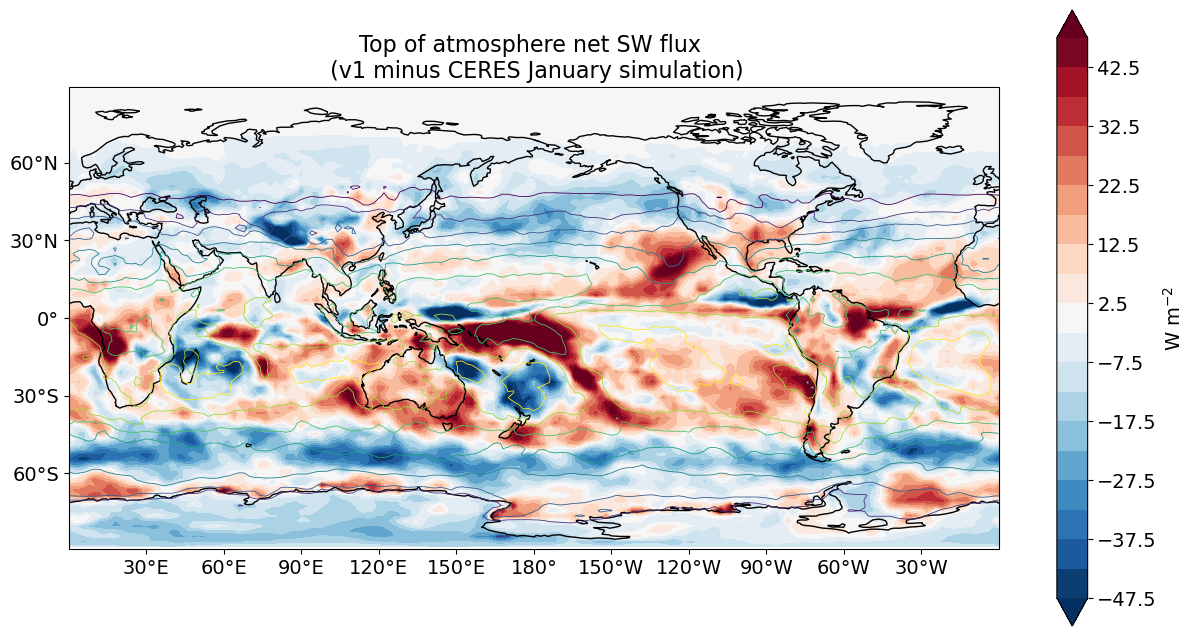

In [20]:
## Plot out the difference map in filled contours and in contours, show the mean value (maybe unnecessary)

rgr_lat=np.array(regridded_tempAvg_SWnet_v1_Oct.lat)
rgr_lon=np.array(regridded_tempAvg_SWnet_v1_Oct.lon)

levels=np.arange(-47.5,48,5)                                 # set color contour levels
levels_contour=np.arange(100,420,40)                         # set line contour levels

Pac_centered=ccrs.PlateCarree(central_longitude=180)         # Pacific centered plot
fig=plt.figure(figsize=(15,8))                               # set figure size
gs = fig.add_gridspec(2,2)
ax1=fig.add_subplot(gs[:,:], projection=Pac_centered)
ax1.set_xticks([30,60,90,120,150,180,210,240,270,300,330], crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-60,61,30), crs=ccrs.PlateCarree())
ax1.set_extent([0,359.9,-89.5,89.5],crs=ccrs.PlateCarree())
cm = plt.cm.get_cmap('RdBu_r')                                #set colormap 

sc=ax1.contourf(rgr_lon, rgr_lat, np.array(regridded_tempAvg_SWnet_v1_Jan)-np.array(regridded_tempAvg_SWnet_CERES_Jan),
                     transform=ccrs.PlateCarree(),
#                     norm=norm,
                     levels=levels,
                     cmap=cm,
                     extend='both')


#cm2 = plt.cm.get_cmap('RdBu_r')
sc2=ax1.contour(rgr_lon, rgr_lat, np.array(regridded_tempAvg_SWnet_CERES_Jan),
                transform=ccrs.PlateCarree(),
                levels=levels_contour,color='k',linewidths=0.6)

ax1.coastlines()
colbar=plt.colorbar(sc)
colbar.set_label(label='W m$^{-2}$',fontsize=14)             # units of the color contours
colbar.ax.tick_params(labelsize=14)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

plt.yticks(size=14)
plt.xticks(size=14)
ax1.set_title(''.join(['Top of atmosphere net SW flux \n (v1 minus CERES January simulation)']),fontsize=16) # set title


Text(0.5, 1.0, 'Top of atmosphere net SW flux \n (v1 minus CERES April simulation)')

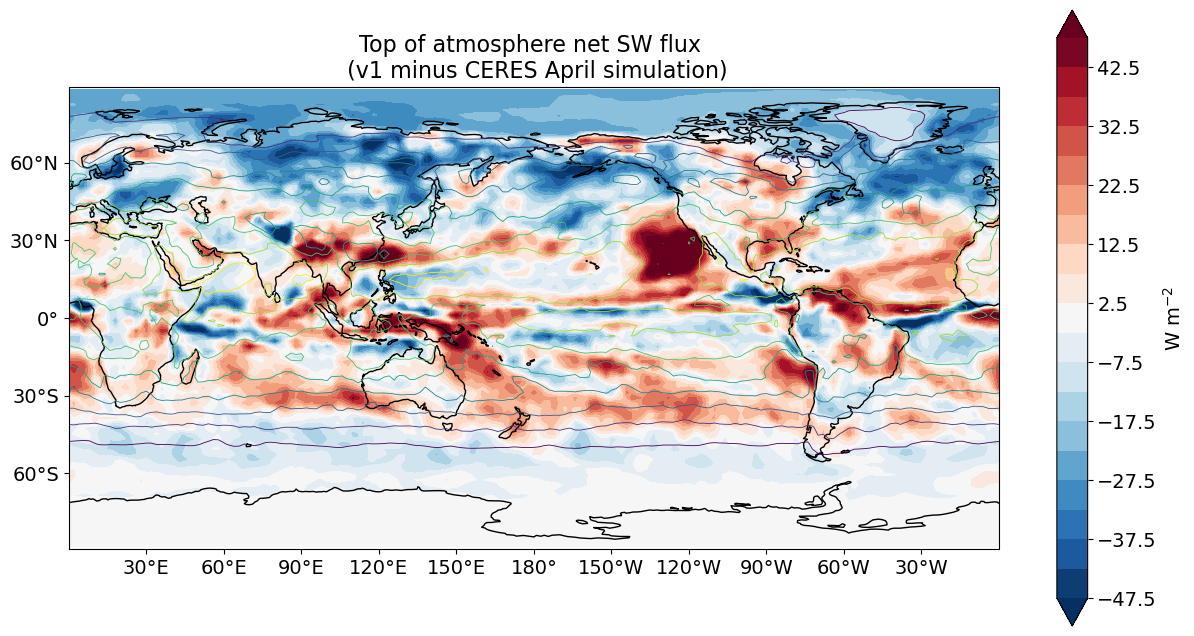

In [21]:
rgr_lat=np.array(regridded_tempAvg_SWnet_v1_Oct.lat)
rgr_lon=np.array(regridded_tempAvg_SWnet_v1_Oct.lon)

levels=np.arange(-47.5,48,5)
levels_contour=np.arange(100,420,40)

Pac_centered=ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ax1=fig.add_subplot(gs[:,:], projection=Pac_centered)
ax1.set_xticks([30,60,90,120,150,180,210,240,270,300,330], crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-60,61,30), crs=ccrs.PlateCarree())
ax1.set_extent([0,359.9,-89.5,89.5],crs=ccrs.PlateCarree())
cm = plt.cm.get_cmap('RdBu_r')
#sc=plt.scatter(np.squeeze(lon_d_vic_cold_smaller),np.squeeze(lat_d_vic_cold_smaller),c=np.squeeze(FLNT_small_patch),vmin=-300, vmax=0, s=7,edgecolors='none',cmap=cm,transform=ccrs.PlateCarree())
sc=ax1.contourf(rgr_lon, rgr_lat, np.array(regridded_tempAvg_SWnet_v1_Apr)-np.array(regridded_tempAvg_SWnet_CERES_Apr),
                     transform=ccrs.PlateCarree(),
#                     norm=norm,
                     levels=levels,
                     cmap=cm,
                     extend='both')


#cm2 = plt.cm.get_cmap('RdBu_r')
sc2=ax1.contour(rgr_lon, rgr_lat, np.array(regridded_tempAvg_SWnet_CERES_Apr),
                transform=ccrs.PlateCarree(),
                levels=levels_contour,color='k',linewidths=0.6)

ax1.coastlines()
colbar=plt.colorbar(sc)
colbar.set_label(label='W m$^{-2}$',fontsize=14)
colbar.ax.tick_params(labelsize=14)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

plt.yticks(size=14)
plt.xticks(size=14)
ax1.set_title(''.join(['Top of atmosphere net SW flux \n (v1 minus CERES April simulation)']),fontsize=16)


Text(0.5, 1.0, 'Top of atmosphere net SW flux \n (v1 minus CERES August simulation)')

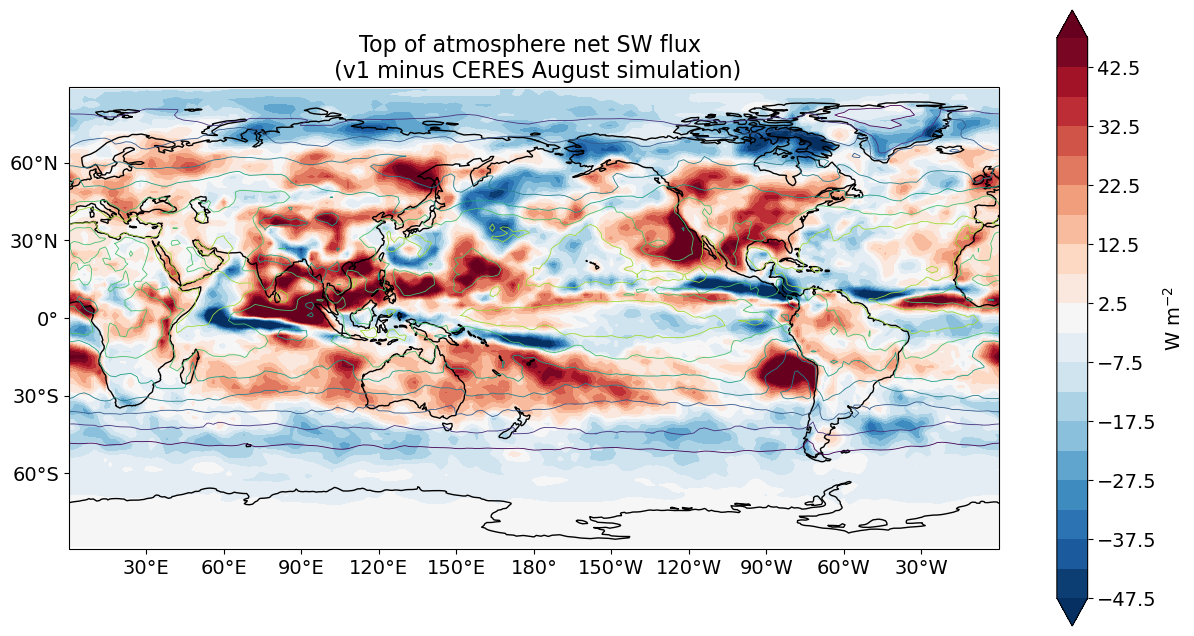

In [22]:
rgr_lat=np.array(regridded_tempAvg_SWnet_v1_Oct.lat)
rgr_lon=np.array(regridded_tempAvg_SWnet_v1_Oct.lon)

levels=np.arange(-47.5,48,5)
levels_contour=np.arange(100,420,40)

Pac_centered=ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ax1=fig.add_subplot(gs[:,:], projection=Pac_centered)
ax1.set_xticks([30,60,90,120,150,180,210,240,270,300,330], crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-60,61,30), crs=ccrs.PlateCarree())
ax1.set_extent([0,359.9,-89.5,89.5],crs=ccrs.PlateCarree())
cm = plt.cm.get_cmap('RdBu_r')
#sc=plt.scatter(np.squeeze(lon_d_vic_cold_smaller),np.squeeze(lat_d_vic_cold_smaller),c=np.squeeze(FLNT_small_patch),vmin=-300, vmax=0, s=7,edgecolors='none',cmap=cm,transform=ccrs.PlateCarree())
sc=ax1.contourf(rgr_lon, rgr_lat, np.array(regridded_tempAvg_SWnet_v1_Aug)-np.array(regridded_tempAvg_SWnet_CERES_Aug),
                     transform=ccrs.PlateCarree(),
#                     norm=norm,
                     levels=levels,
                     cmap=cm,
                     extend='both')


#cm2 = plt.cm.get_cmap('RdBu_r')
sc2=ax1.contour(rgr_lon, rgr_lat, np.array(regridded_tempAvg_SWnet_CERES_Aug),
                transform=ccrs.PlateCarree(),
                levels=levels_contour,color='k',linewidths=0.6)

ax1.coastlines()
colbar=plt.colorbar(sc)
colbar.set_label(label='W m$^{-2}$',fontsize=14)
colbar.ax.tick_params(labelsize=14)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

plt.yticks(size=14)
plt.xticks(size=14)
ax1.set_title(''.join(['Top of atmosphere net SW flux \n (v1 minus CERES August simulation)']),fontsize=16)


Text(0.5, 1.0, 'Top of atmosphere net SW flux \n (v1 minus CERES October simulation)')

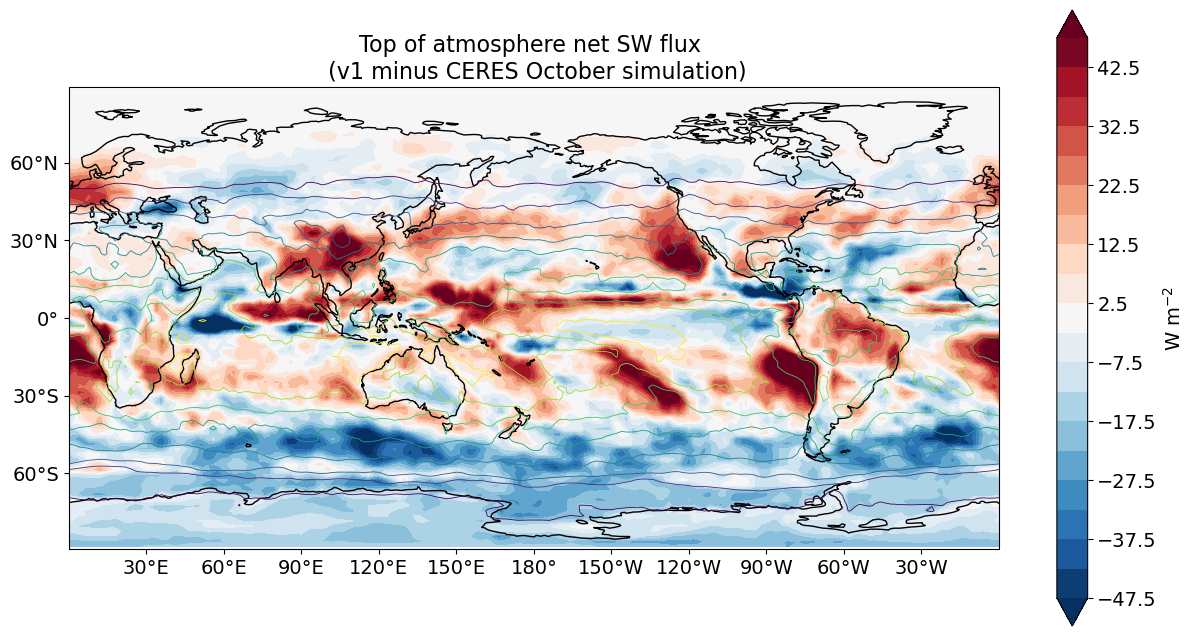

In [23]:
rgr_lat=np.array(regridded_tempAvg_SWnet_v1_Oct.lat)
rgr_lon=np.array(regridded_tempAvg_SWnet_v1_Oct.lon)

levels=np.arange(-47.5,48,5)
levels_contour=np.arange(100,420,40)

Pac_centered=ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ax1=fig.add_subplot(gs[:,:], projection=Pac_centered)
ax1.set_xticks([30,60,90,120,150,180,210,240,270,300,330], crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-60,61,30), crs=ccrs.PlateCarree())
ax1.set_extent([0,359.9,-89.5,89.5],crs=ccrs.PlateCarree())
cm = plt.cm.get_cmap('RdBu_r')
#sc=plt.scatter(np.squeeze(lon_d_vic_cold_smaller),np.squeeze(lat_d_vic_cold_smaller),c=np.squeeze(FLNT_small_patch),vmin=-300, vmax=0, s=7,edgecolors='none',cmap=cm,transform=ccrs.PlateCarree())
sc=ax1.contourf(rgr_lon, rgr_lat, np.array(regridded_tempAvg_SWnet_v1_Oct)-np.array(regridded_tempAvg_SWnet_CERES_Oct),
                     transform=ccrs.PlateCarree(),
#                     norm=norm,
                     levels=levels,
                     cmap=cm,
                     extend='both')


#cm2 = plt.cm.get_cmap('RdBu_r')
sc2=ax1.contour(rgr_lon, rgr_lat, np.array(regridded_tempAvg_SWnet_CERES_Oct),
                transform=ccrs.PlateCarree(),
                levels=levels_contour,color='k',linewidths=0.6)

ax1.coastlines()
colbar=plt.colorbar(sc)
colbar.set_label(label='W m$^{-2}$',fontsize=14)
colbar.ax.tick_params(labelsize=14)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

plt.yticks(size=14)
plt.xticks(size=14)
ax1.set_title(''.join(['Top of atmosphere net SW flux \n (v1 minus CERES October simulation)']),fontsize=16)


### Switch from SW flux to LW flux plots

In [24]:
# v1 Jan sim
regridded_tempAvg_LWup_v1_Jan=calc_timemean_average(f_Jan,"LW_flux_up@tom",'2020-01-22 00:00:00', '2020-02-28 23:59:59',output_grid,1)
regridded_tempAvg_LWnet_v1_Jan=regridded_tempAvg_LWup_v1_Jan["LW_flux_up@tom"]
# CERES Jan
regridded_tempAvg_LWup_CERES_Jan=calc_timemean_average(f_Jan_CERES,'adj_atmos_lw_up_all_toa_daily','2020-01-22 00:00:00', '2020-02-28 23:59:59',output_grid,1)
regridded_tempAvg_LWnet_CERES_Jan=regridded_tempAvg_LWup_CERES_Jan.adj_atmos_lw_up_all_toa_daily



# v1 Apr sim
regridded_tempAvg_LWup_v1_Apr=calc_timemean_average(f_Apr,"LW_flux_up@tom",'2013-04-03 00:00:00', '2013-05-10 23:59:59',output_grid,1)
regridded_tempAvg_LWnet_v1_Apr=regridded_tempAvg_LWup_v1_Apr["LW_flux_up@tom"]
# CERES Apr
regridded_tempAvg_LWup_CERES_Apr=calc_timemean_average(f_Apr_CERES,'adj_atmos_lw_up_all_toa_daily','2013-04-03 00:00:00', '2013-05-10 23:59:59',output_grid,1)
regridded_tempAvg_LWnet_CERES_Apr=regridded_tempAvg_LWup_CERES_Apr.adj_atmos_lw_up_all_toa_daily

# v1 Aug sim
regridded_tempAvg_LWup_v1_Aug=calc_timemean_average(f_Aug,"LW_flux_up@tom",'2016-08-03 00:00:00', '2016-09-09 23:59:59',output_grid,1)
regridded_tempAvg_LWnet_v1_Aug=regridded_tempAvg_LWup_v1_Aug["LW_flux_up@tom"]
# CERES Aug
regridded_tempAvg_LWup_CERES_Aug=calc_timemean_average(f_Aug_CERES,'adj_atmos_lw_up_all_toa_daily','2016-08-03 00:00:00', '2016-09-09 23:59:59',output_grid,1)
regridded_tempAvg_LWnet_CERES_Aug=regridded_tempAvg_LWup_CERES_Aug.adj_atmos_lw_up_all_toa_daily



# v1 Oct sim
regridded_tempAvg_LWup_v1_Oct=calc_timemean_average(f_Oct,"LW_flux_up@tom",'2013-10-03 00:00:00', '2013-11-09 23:59:59',output_grid,1)
regridded_tempAvg_LWnet_v1_Oct=regridded_tempAvg_LWup_v1_Oct["LW_flux_up@tom"]
# CERES Oct
regridded_tempAvg_LWup_CERES_Oct=calc_timemean_average(f_Oct_CERES,'adj_atmos_lw_up_all_toa_daily','2013-10-03 00:00:00', '2013-11-09 23:59:59',output_grid,1)
regridded_tempAvg_LWnet_CERES_Oct=regridded_tempAvg_LWup_CERES_Oct.adj_atmos_lw_up_all_toa_daily





/global/common/software/e3sm/anaconda_envs/base/envs/e3sm_unified_1.8.0_nompi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'color'
  result = super().contour(*args, **kwargs)


Text(0.5, 1.0, 'Top of atmosphere net LW flux \n (v1 minus CERES January simulation)')

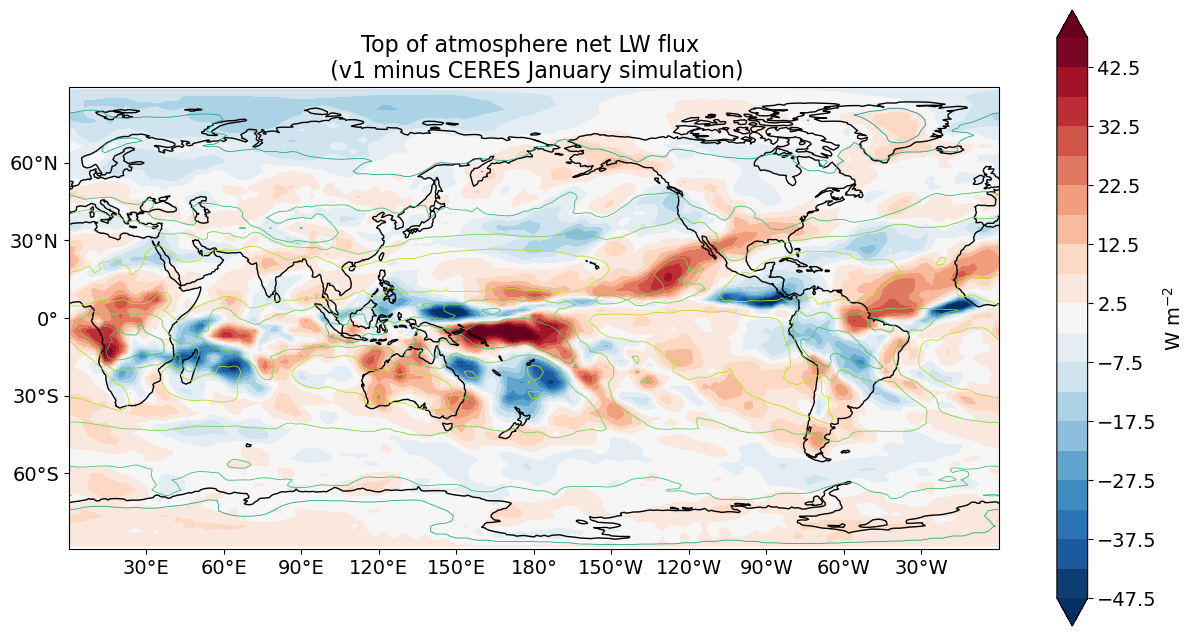

In [25]:
rgr_lat=np.array(regridded_tempAvg_SWnet_v1_Oct.lat)
rgr_lon=np.array(regridded_tempAvg_SWnet_v1_Oct.lon)

levels=np.arange(-47.5,48,5)
levels_contour=np.arange(0,330,30)

Pac_centered=ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ax1=fig.add_subplot(gs[:,:], projection=Pac_centered)
ax1.set_xticks([30,60,90,120,150,180,210,240,270,300,330], crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-60,61,30), crs=ccrs.PlateCarree())
ax1.set_extent([0,359.9,-89.5,89.5],crs=ccrs.PlateCarree())
cm = plt.cm.get_cmap('RdBu_r')
#sc=plt.scatter(np.squeeze(lon_d_vic_cold_smaller),np.squeeze(lat_d_vic_cold_smaller),c=np.squeeze(FLNT_small_patch),vmin=-300, vmax=0, s=7,edgecolors='none',cmap=cm,transform=ccrs.PlateCarree())
sc=ax1.contourf(rgr_lon, rgr_lat, np.array(regridded_tempAvg_LWnet_v1_Jan)-np.array(regridded_tempAvg_LWnet_CERES_Jan),
                     transform=ccrs.PlateCarree(),
#                     norm=norm,
                     levels=levels,
                     cmap=cm,
                     extend='both')


#cm2 = plt.cm.get_cmap('RdBu_r')
sc2=ax1.contour(rgr_lon, rgr_lat, np.array(regridded_tempAvg_LWnet_CERES_Jan),
                transform=ccrs.PlateCarree(),
                levels=levels_contour,color='k',linewidths=0.6)

ax1.coastlines()
colbar=plt.colorbar(sc)
colbar.set_label(label='W m$^{-2}$',fontsize=14)
colbar.ax.tick_params(labelsize=14)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

plt.yticks(size=14)
plt.xticks(size=14)
ax1.set_title(''.join(['Top of atmosphere net LW flux \n (v1 minus CERES January simulation)']),fontsize=16)


Text(0.5, 1.0, 'Top of atmosphere net LW flux \n (v1 minus CERES April simulation)')

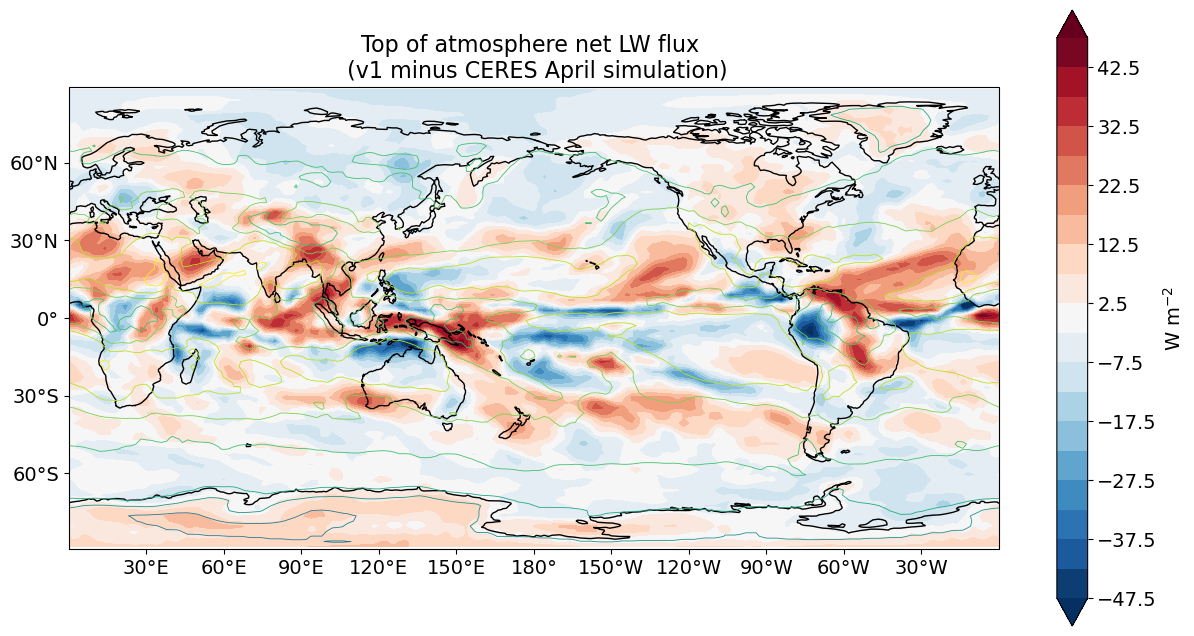

In [26]:
rgr_lat=np.array(regridded_tempAvg_SWnet_v1_Oct.lat)
rgr_lon=np.array(regridded_tempAvg_SWnet_v1_Oct.lon)

levels=np.arange(-47.5,48,5)
levels_contour=np.arange(0,330,30)

Pac_centered=ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ax1=fig.add_subplot(gs[:,:], projection=Pac_centered)
ax1.set_xticks([30,60,90,120,150,180,210,240,270,300,330], crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-60,61,30), crs=ccrs.PlateCarree())
ax1.set_extent([0,359.9,-89.5,89.5],crs=ccrs.PlateCarree())
cm = plt.cm.get_cmap('RdBu_r')
#sc=plt.scatter(np.squeeze(lon_d_vic_cold_smaller),np.squeeze(lat_d_vic_cold_smaller),c=np.squeeze(FLNT_small_patch),vmin=-300, vmax=0, s=7,edgecolors='none',cmap=cm,transform=ccrs.PlateCarree())
sc=ax1.contourf(rgr_lon, rgr_lat, np.array(regridded_tempAvg_LWnet_v1_Apr)-np.array(regridded_tempAvg_LWnet_CERES_Apr),
                     transform=ccrs.PlateCarree(),
#                     norm=norm,
                     levels=levels,
                     cmap=cm,
                     extend='both')


#cm2 = plt.cm.get_cmap('RdBu_r')
sc2=ax1.contour(rgr_lon, rgr_lat, np.array(regridded_tempAvg_LWnet_CERES_Apr),
                transform=ccrs.PlateCarree(),
                levels=levels_contour,color='k',linewidths=0.6)

ax1.coastlines()
colbar=plt.colorbar(sc)
colbar.set_label(label='W m$^{-2}$',fontsize=14)
colbar.ax.tick_params(labelsize=14)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

plt.yticks(size=14)
plt.xticks(size=14)
ax1.set_title(''.join(['Top of atmosphere net LW flux \n (v1 minus CERES April simulation)']),fontsize=16)


Text(0.5, 1.0, 'Top of atmosphere net LW flux \n (v1 minus CERES August simulation)')

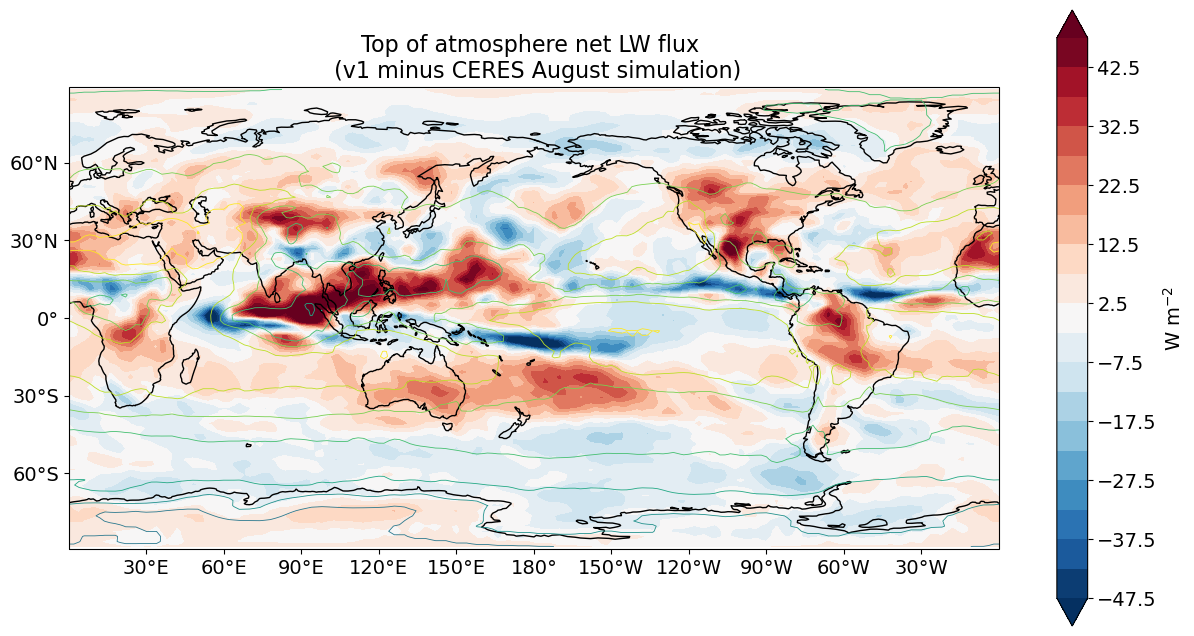

In [27]:
rgr_lat=np.array(regridded_tempAvg_SWnet_v1_Oct.lat)
rgr_lon=np.array(regridded_tempAvg_SWnet_v1_Oct.lon)

levels=np.arange(-47.5,48,5)
levels_contour=np.arange(0,330,30)

Pac_centered=ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ax1=fig.add_subplot(gs[:,:], projection=Pac_centered)
ax1.set_xticks([30,60,90,120,150,180,210,240,270,300,330], crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-60,61,30), crs=ccrs.PlateCarree())
ax1.set_extent([0,359.9,-89.5,89.5],crs=ccrs.PlateCarree())
cm = plt.cm.get_cmap('RdBu_r')
#sc=plt.scatter(np.squeeze(lon_d_vic_cold_smaller),np.squeeze(lat_d_vic_cold_smaller),c=np.squeeze(FLNT_small_patch),vmin=-300, vmax=0, s=7,edgecolors='none',cmap=cm,transform=ccrs.PlateCarree())
sc=ax1.contourf(rgr_lon, rgr_lat, np.array(regridded_tempAvg_LWnet_v1_Aug)-np.array(regridded_tempAvg_LWnet_CERES_Aug),
                     transform=ccrs.PlateCarree(),
#                     norm=norm,
                     levels=levels,
                     cmap=cm,
                     extend='both')


#cm2 = plt.cm.get_cmap('RdBu_r')
sc2=ax1.contour(rgr_lon, rgr_lat, np.array(regridded_tempAvg_LWnet_CERES_Aug),
                transform=ccrs.PlateCarree(),
                levels=levels_contour,color='k',linewidths=0.6)

ax1.coastlines()
colbar=plt.colorbar(sc)
colbar.set_label(label='W m$^{-2}$',fontsize=14)
colbar.ax.tick_params(labelsize=14)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

plt.yticks(size=14)
plt.xticks(size=14)
ax1.set_title(''.join(['Top of atmosphere net LW flux \n (v1 minus CERES August simulation)']),fontsize=16)


Text(0.5, 1.0, 'Top of atmosphere net LW flux \n (v1 minus CERES October simulation)')

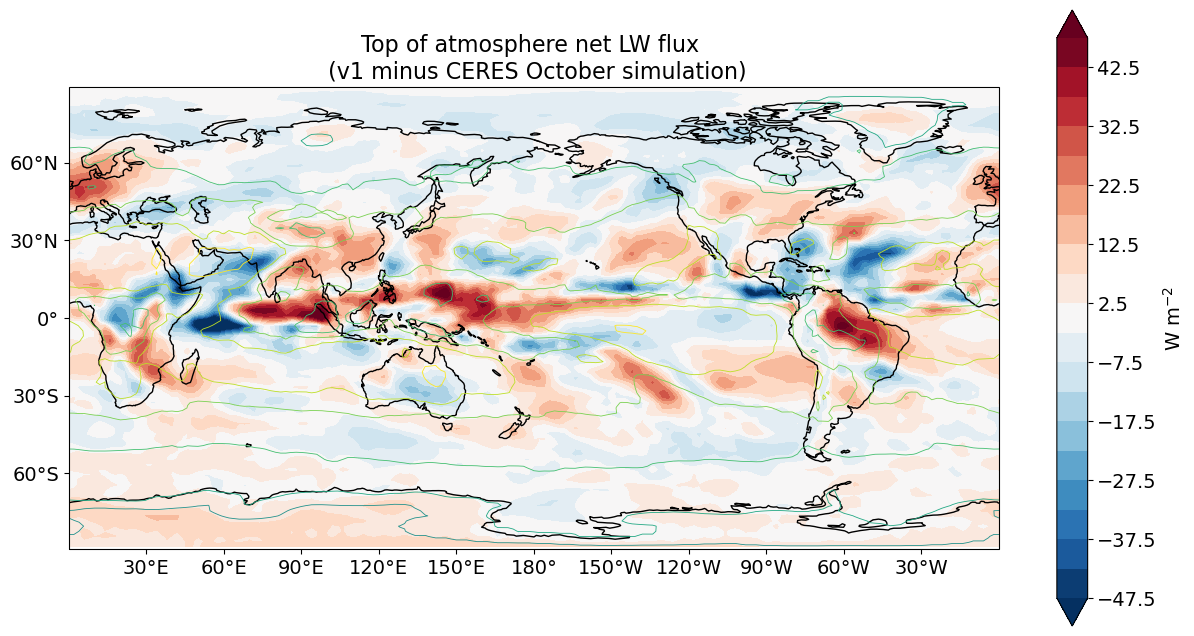

In [28]:
rgr_lat=np.array(regridded_tempAvg_SWnet_v1_Oct.lat)
rgr_lon=np.array(regridded_tempAvg_SWnet_v1_Oct.lon)

levels=np.arange(-47.5,48,5)
levels_contour=np.arange(0,330,30)

Pac_centered=ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ax1=fig.add_subplot(gs[:,:], projection=Pac_centered)
ax1.set_xticks([30,60,90,120,150,180,210,240,270,300,330], crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-60,61,30), crs=ccrs.PlateCarree())
ax1.set_extent([0,359.9,-89.5,89.5],crs=ccrs.PlateCarree())
cm = plt.cm.get_cmap('RdBu_r')
#sc=plt.scatter(np.squeeze(lon_d_vic_cold_smaller),np.squeeze(lat_d_vic_cold_smaller),c=np.squeeze(FLNT_small_patch),vmin=-300, vmax=0, s=7,edgecolors='none',cmap=cm,transform=ccrs.PlateCarree())
sc=ax1.contourf(rgr_lon, rgr_lat, np.array(regridded_tempAvg_LWnet_v1_Oct)-np.array(regridded_tempAvg_LWnet_CERES_Oct),
                     transform=ccrs.PlateCarree(),
#                     norm=norm,
                     levels=levels,
                     cmap=cm,
                     extend='both')


#cm2 = plt.cm.get_cmap('RdBu_r')
sc2=ax1.contour(rgr_lon, rgr_lat, np.array(regridded_tempAvg_LWnet_CERES_Oct),
                transform=ccrs.PlateCarree(),
                levels=levels_contour,color='k',linewidths=0.6)

ax1.coastlines()
colbar=plt.colorbar(sc)
colbar.set_label(label='W m$^{-2}$',fontsize=14)
colbar.ax.tick_params(labelsize=14)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

plt.yticks(size=14)
plt.xticks(size=14)
ax1.set_title(''.join(['Top of atmosphere net LW flux \n (v1 minus CERES October simulation)']),fontsize=16)


In [29]:
## Print out the global mean differences in LW flux for v1 and CERES


glb_mean_LWup_v1=regridded_tempAvg_LWup_v1_Jan.spatial.average("LW_flux_up@tom",axis="XY")["LW_flux_up@tom"]
glb_mean_LWup_CERES=regridded_tempAvg_LWup_CERES_Jan.spatial.average("adj_atmos_lw_up_all_toa_daily",axis="XY")["adj_atmos_lw_up_all_toa_daily"]

print('Jan')
glb_mean_LWnet_v1=glb_mean_LWup_v1
print(np.array(glb_mean_LWnet_v1))
glb_mean_LWnet_CERES=glb_mean_LWup_CERES
print(glb_mean_LWnet_CERES)
print(np.array(glb_mean_LWnet_v1-glb_mean_LWnet_CERES))


glb_mean_LWup_v1=regridded_tempAvg_LWup_v1_Apr.spatial.average("LW_flux_up@tom",axis="XY")["LW_flux_up@tom"]
glb_mean_LWup_CERES=regridded_tempAvg_LWup_CERES_Apr.spatial.average("adj_atmos_lw_up_all_toa_daily",axis="XY")["adj_atmos_lw_up_all_toa_daily"]

print('Apr')
glb_mean_LWnet_v1=glb_mean_LWup_v1
print(np.array(glb_mean_LWnet_v1))
glb_mean_LWnet_CERES=glb_mean_LWup_CERES
print(glb_mean_LWnet_CERES)
print(np.array(glb_mean_LWnet_v1-glb_mean_LWnet_CERES))


glb_mean_LWup_v1=regridded_tempAvg_LWup_v1_Aug.spatial.average("LW_flux_up@tom",axis="XY")["LW_flux_up@tom"]
glb_mean_LWup_CERES=regridded_tempAvg_LWup_CERES_Aug.spatial.average("adj_atmos_lw_up_all_toa_daily",axis="XY")["adj_atmos_lw_up_all_toa_daily"]

print('Aug')
glb_mean_LWnet_v1=glb_mean_LWup_v1
print(np.array(glb_mean_LWnet_v1))
glb_mean_LWnet_CERES=glb_mean_LWup_CERES
print(glb_mean_LWnet_CERES)
print(np.array(glb_mean_LWnet_v1-glb_mean_LWnet_CERES))


glb_mean_LWup_v1=regridded_tempAvg_LWup_v1_Oct.spatial.average("LW_flux_up@tom",axis="XY")["LW_flux_up@tom"]
glb_mean_LWup_CERES=regridded_tempAvg_LWup_CERES_Oct.spatial.average("adj_atmos_lw_up_all_toa_daily",axis="XY")["adj_atmos_lw_up_all_toa_daily"]

print('Oct')
glb_mean_LWnet_v1=glb_mean_LWup_v1
print(np.array(glb_mean_LWnet_v1))
glb_mean_LWnet_CERES=glb_mean_LWup_CERES
print(glb_mean_LWnet_CERES)
print(np.array(glb_mean_LWnet_v1-glb_mean_LWnet_CERES))

Jan
236.96281333669242
<xarray.DataArray 'adj_atmos_lw_up_all_toa_daily' ()>
array(235.8974103)
1.0654030347666605
Apr
238.3020438992287
<xarray.DataArray 'adj_atmos_lw_up_all_toa_daily' ()>
array(237.45666785)
0.8453760537186668
Aug
244.9542944083272
<xarray.DataArray 'adj_atmos_lw_up_all_toa_daily' ()>
array(241.96389405)
2.9904003598753945
Oct
238.95769226745713
<xarray.DataArray 'adj_atmos_lw_up_all_toa_daily' ()>
array(238.2741009)
0.6835913632640143
